In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

#  Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/uciml/glass . Данные представлены в 
виде csv таблицы.
2. Загрузить датасет в датафрейм, и разделить данные на 
описательные признаки и признак отображающий класс

In [33]:
import pandas as pd
import numpy as np 
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [34]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [172]:
df.shape

(214, 10)

In [35]:
data

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

3. Нормирование данных к интервалу [0 1]

In [36]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data) 

4. Диаграммы рассеяния для пар признаков:

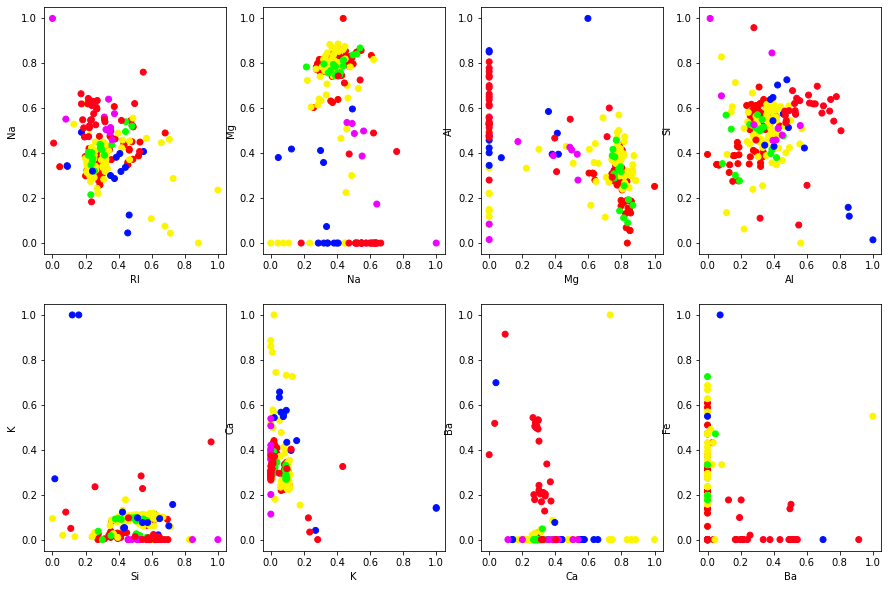

In [54]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,4, figsize=(15,10))
for i in range(data.shape[1]-1):    
    axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv') 
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
plt.show()

Определение соответствие цвета на диаграмме и класса в датасете:

Mинимальные/максимальные значения класса соответсвуют нижней/верхней части цветовой карты

In [68]:
set(df.Type)

{1, 2, 3, 5, 6, 7}

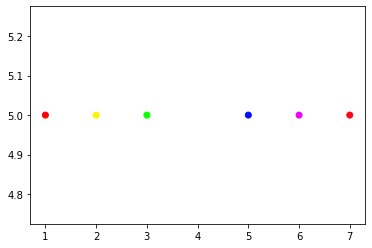

In [69]:
x = np.array([1,2,3,5,6,7])
y = x
t = x
fig,ax1= plt.subplots(1, 1)
ax1.scatter(x, np.array([5,5,5,5,5,5]), c=t, cmap='hsv')
plt.show()

#  Метод главных компонент

1. Используя метод главных компонент (PCA). Проведите понижение размерности 
пространства до размерности 2

In [238]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

2. Выведите значение объясненной дисперсии в процентах и собственные числа 
соответствующие компонентам

In [239]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


3. Постройте диаграмму рассеяния после метода главных компонент

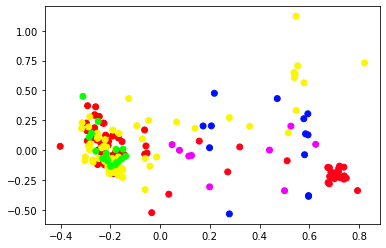

In [72]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

In [240]:
pca.explained_variance_ratio_.sum()

0.6341966621042776

4. Проанализируйте и обоснуйте полученные результаты

В данной диаграмме мы использовали первую и вторую главные компоненты. Вместе они объясняют около 63,5% дисперсии исходных данных. Треть информации мы теряем. Компоненты не коррелируют между собой, поэтому scatterplot имеет такой "разреженный" вид. 
Суть метода главных компонент состоит в том, чтобы уменьшить пространство размерности признаков, что и произошло (2 вместо 9). Новая матрицы со значениями главных компонент является неким приближением...
Также точки данных сохранили метки класса, поэтому можно видить окрашивание в разные цвета. Однако снижение размерности пространства не показало интересной картины (например, данные не сгруппировались по классам).

5. Изменяя количество компонент, определите количество при котором компоненты 
объясняют не менее 85% дисперсии данных

In [217]:
e_v = 0
n_components = 1
while e_v < 0.85:
    n_components  += 1
    pca = PCA(n_components = n_components)
    pca_data = pca.fit(data).transform(data)
    e_v = pca.explained_variance_ratio_.sum()
print(n_components)

4


In [224]:
pca_data.shape

(214, 4)

6. Используя метод inverse_transform восстановите данные, сравните с исходными

In [228]:
recovered_data = pca.inverse_transform(pca_data)

In [229]:
recovered_data.shape, data.shape

((214, 9), (214, 9))

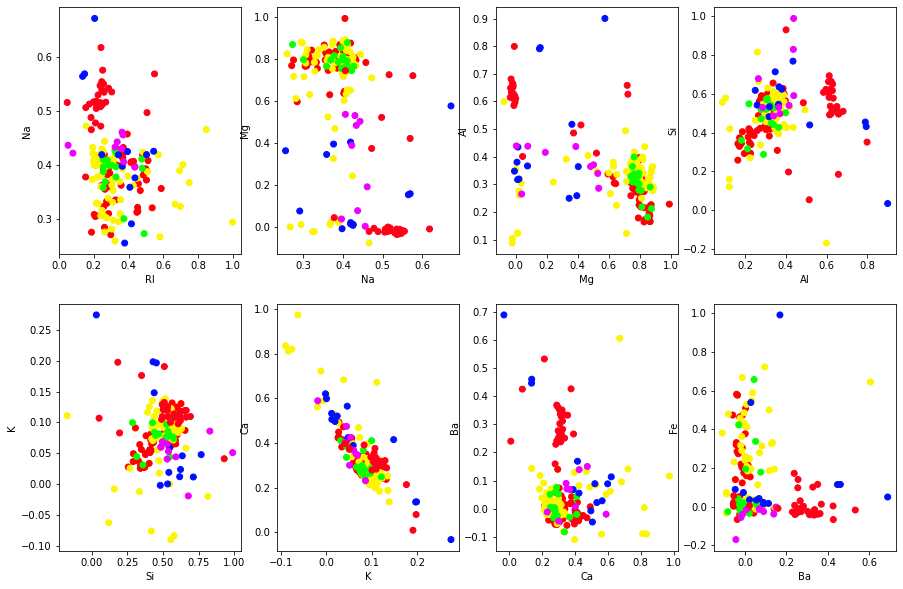

In [230]:
fig, axs = plt.subplots(2,4, figsize=(15,10))
for i in range(recovered_data.shape[1]-1):    
    axs[i // 4, i % 4].scatter(recovered_data[:,i],recovered_data[:,(i+1)],c=labels,cmap='hsv') 
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])
plt.show()

7. Исследуйте метод главных компонент при различных параметрах svd_solver

svd - сингулярное разложение матрицы

In [236]:
# auto SVD
svd_solver = 'auto'
pca = PCA(n_components = 4,svd_solver=svd_solver)
pca_data = pca.fit(data).transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


In [231]:
# точный полный SVD
svd_solver = 'full'
pca = PCA(n_components = 4,svd_solver=svd_solver)
pca_data = pca.fit(data).transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


In [235]:
# SVD, усеченный до n_components
svd_solver = 'arpack'
pca = PCA(n_components = 4,svd_solver=svd_solver)
pca_data = pca.fit(data).transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


In [234]:
# рандомизированную SVD по методу Halko
svd_solver = 'randomized'
pca = PCA(n_components = 4,svd_solver=svd_solver)
pca_data = pca.fit(data).transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


# Модификации метода главных компонент

1. По аналогии с PCA исследуйте KernelPCA для различных параметров kernel и различных 
параметрах для ядра

2. Определите, при каких параметрах KernelPCA работает также как PCA

3. Аналогично исследуйте SparcePCA

4. Проанализируйте и обоснуйте полученные результаты

# Факторный анализ

1. Проведите понижении размерности используя факторный анализ FactorAnalysis

2. Сравните полученные результаты с PCA

3. Объясните в чем разница между методом главных компонент и факторным анализом